# *Homework no.8*
## **Exercise:**
- Perform Kruskal-Wallis test and plot a box plot for DIC and temperature data.

In [5]:
def import_csv(file):
    import pandas as pd
    return pd.read_csv(file)
path = "../Curso_Python_Mayte/data/Terminos_lagoon_TA_DIC_2023_RawData.csv"
CO2Data = import_csv(path)

In [6]:
CO2Data.head()

,sample,date,estuary,area,station,layer_depth,season,chlorophy_microg_l,cond_microsiemens_cm,depth_m,...,do_mg_l,sal_psu,sp_cond_microsiemens_cm,turbidity_fnu,temp_c,latitude,longitude,dic_micromol_kg,ta_micromol_kg,dummy_data
0,CDL01S,5/3/2020,Candelaria,River,CDL01,Surface,Dry,0.36,7015.4,0.464,...,7.12,3.56,6547.7,1.47,28.740,18.55736,-91.25012,3915,3863,3685.0
1,CDL01F,5/3/2020,Candelaria,River,CDL01,Bottom,Dry,4.19,29886.1,7.792,...,4.90,16.97,27751.2,95.33,29.028,18.55722,-91.24990,3698,3685,NaN
2,CDL02S,5/3/2020,Candelaria,River,CDL02,Surface,Dry,0.92,16691.1,0.453,...,6.99,8.94,15429.1,5.50,29.283,18.61007,-91.24410,3724,3708,3708.0
3,CDL02F,5/3/2020,Candelaria,River,CDL02,Bottom,Dry,2.23,24847.4,1.261,...,6.52,13.87,23074.0,13.44,29.024,18.61005,-91.24403,3667,3992,3992.0
4,CDL03S,5/3/2020,Candelaria,River,CDL03,Surface,Dry,0.58,46341.6,0.465,...,6.24,28.06,43670.8,3.60,28.202,18.63166,-91.29359,2928,3023,3023.0


In [7]:
from scipy.stats import kruskal

def kruskal_wallis_test(*groups, alpha=0.05):
    """
    Performs the Kruskal-Wallis H-test for independent samples.
    Accepts multiple groups as arguments.
    Prints the H statistic, p-value, and interpretation.
    """
    result = kruskal(*groups)
    
    print(f"H statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")
    
    if result.pvalue < alpha:
        print("The difference between groups is statistically significant.")
    else:
        print("No statistically significant difference between groups.")


In [8]:
import scikit_posthocs as sp
# You need to install the scikit-posthocs package: conda install -c conda-forge scikit-posthocs

def dunn_posthoc(data, group_col, value_col, p_adjust='bonferroni'):
    """
    Runs Dunn's post-hoc test after Kruskal-Wallis.
    """
    result = sp.posthoc_dunn(data, val_col=value_col, group_col=group_col, p_adjust=p_adjust)
    print(result)
    return result

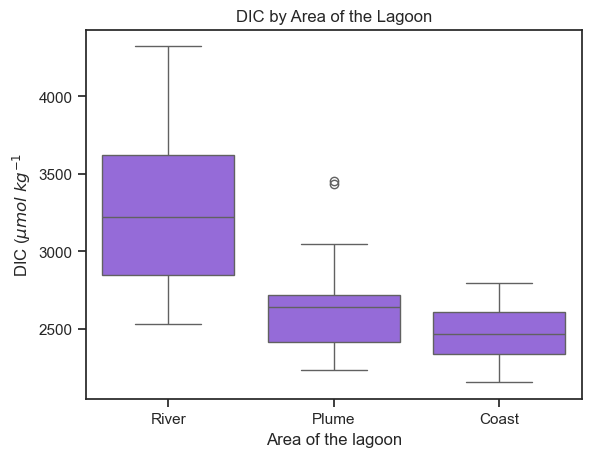

In [9]:
# Plot DIC values for each area of the lagoon using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

my_colors = ["#9159EA", "#4757ea", "#259773"]
sns.set(font_scale=1, style="ticks", palette= my_colors)

sns.boxplot(x='area', y='dic_micromol_kg', data=CO2Data)
plt.xlabel('Area of the lagoon')
plt.ylabel('DIC ($\mu mol \; kg^{-1}$')
plt.title('DIC by Area of the Lagoon')
plt.show()

In [11]:
# Select the data for each area of the lagoon
dic_river = CO2Data[CO2Data['area'] == 'River']['dic_micromol_kg']
dic_plume = CO2Data[CO2Data['area'] == 'Plume']['dic_micromol_kg']
dic_coast= CO2Data[CO2Data['area'] == 'Coast']['dic_micromol_kg']

In [12]:
# Perform the Kruskal-Wallis test
kruskal_wallis_test(dic_river, dic_plume, dic_coast)

H statistic = 55.889669058187486
p-value = 7.306553461098262e-13
The difference between groups is statistically significant.


In [14]:
dunn_posthoc(CO2Data, 'area', 'dic_micromol_kg')

              Coast     Plume         River
Coast  1.000000e+00  0.063144  7.204720e-13
Plume  6.314392e-02  1.000000  1.885873e-06
River  7.204720e-13  0.000002  1.000000e+00


,Coast,Plume,River
Coast,1.000000e+00,0.063144,7.204720e-13
Plume,6.314392e-02,1.000000,1.885873e-06
River,7.204720e-13,0.000002,1.000000e+00


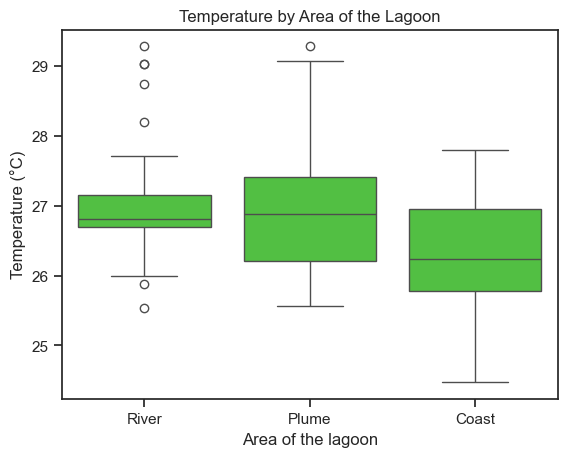

In [15]:
# Plot temperature values for each area of the lagoon using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

my_colors = ["#42D42E", "#daea47", "#076044"]
sns.set(font_scale=1, style="ticks", palette= my_colors)

sns.boxplot(x='area', y='temp_c', data=CO2Data)
plt.xlabel('Area of the lagoon')
plt.ylabel('Temperature (°C)')
plt.title('Temperature by Area of the Lagoon')
plt.show()

In [16]:
# Select the data for each area of the lagoon
t_river = CO2Data[CO2Data['area'] == 'River']['temp_c']
t_plume = CO2Data[CO2Data['area'] == 'Plume']['temp_c']
t_coast= CO2Data[CO2Data['area'] == 'Coast']['temp_c']

In [17]:
# Perform the Kruskal-Wallis test
kruskal_wallis_test(t_river, t_plume, t_coast)

H statistic = 7.6996429549091365
p-value = 0.021283535690208223
The difference between groups is statistically significant.


In [18]:
dunn_posthoc(CO2Data, 'area', 'temp_c')

          Coast    Plume     River
Coast  1.000000  0.06468  0.038761
Plume  0.064680  1.00000  1.000000
River  0.038761  1.00000  1.000000


,Coast,Plume,River
Coast,1.000000,0.06468,0.038761
Plume,0.064680,1.00000,1.000000
River,0.038761,1.00000,1.000000
